# Group 10 - First Year Project 
### Data Science at ITU 
## Project 1 - Road collisions analysis 2021 

The first project of Data Science's second semester required us to inform various city leaders around the United Kingdom about traffic fatalities and injuries; and give some insight for urban transport planning. This jupyter notebook presents Group 10's exploration of 2019 UK road collision data with complimentary analysis, visualisation and findings with relation to the city of Sheffield.


# Task 0 - Data filtering and cleaning
## Loading data
Our first task invovles loading our 3 csv files (downloaded from https://data.gov.uk/dataset/road-accidents-safety-data on the 4th January 2021) into a traversable data structure we can start working with; such as a dictionary. We will then need to start the process of filtering and cleaning our data.

In [2]:
import numpy as np
import pandas as pd
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
raw_data = {}

TITLES = ['accidents', 'casualties', 'vehicles'] # Capitalisation is the standard for constants

Pandas has a convinient method for reading in csv files and storing the data in a DataFrame structure offers flexibility.

In [4]:
raw_data['accidents'] = pd.read_csv("../data/raw/Road Safety Data - Accidents 2019.csv", dtype = None)
raw_data['casualties'] = pd.read_csv("../data/raw/Road Safety Data - Casualties 2019.csv", dtype = None)
raw_data['vehicles'] = pd.read_csv("../data/raw/Road Safety Data- Vehicles 2019.csv", dtype = None) # File name missing a space before hyphen 

C:\Users\Ruben PC\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (0,31) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\Users\Ruben PC\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [5]:
for TITLE in TITLES:
    print(TITLE + "\tDataFrame shape: " + str(raw_data[TITLE].shape))

accidents	DataFrame shape: (117536, 32)
casualties	DataFrame shape: (153158, 16)
vehicles	DataFrame shape: (216381, 23)


 ### Data type insight?

In [6]:
#todo #DO IT FASTER

## Locating our city
With our data loaded into a dictionary of DataFrames, we needed to locate the accidents that occured in Sheffield. To do this we made a mask identifying which accidents occured in the local district authority 215.


In [7]:
sheffield_mask = (raw_data['accidents']["Local_Authority_(District)"] == 215)

In [8]:
sheffield_data = {}

sheffield_data['accidents'] = raw_data['accidents'][sheffield_mask]
sheffield_data['accidents'][:5]

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
44673,2019140805407,429140.0,381931.0,-1.563884,53.333509,14,2,2,1,01/01/2019,...,0,0,1,1,2,0,0,2,1,E01007926
44674,2019140805409,434290.0,385121.0,-1.486208,53.361875,14,3,2,1,01/01/2019,...,0,0,4,1,1,0,0,1,1,E01008052
44676,2019140805414,435393.0,391745.0,-1.468895,53.421340,14,1,1,1,01/01/2019,...,0,1,4,1,1,0,0,1,1,E01008123
44677,2019140805567,433949.0,396778.0,-1.490081,53.466672,14,2,2,1,01/01/2019,...,0,0,1,1,1,0,0,1,1,E01007901
44680,2019140805955,433662.0,389819.0,-1.495146,53.404142,14,3,2,1,03/01/2019,...,0,0,1,1,1,0,0,1,2,E01008093


In [9]:
sheffield_data['accidents'].shape

(909, 32)

We can now see that there are 909 records of road traffic accidents occuring in Sheffield over 2019. The next step was using the primary key (accident_index) of the accidents to find the accidents in Sheffield that each casualty and vehicle linked to, in order to complete our sheffield_data dictionary.

In [10]:
sheffield_data['accidents']["Accident_Index"][:5]

44673    2019140805407
44674    2019140805409
44676    2019140805414
44677    2019140805567
44680    2019140805955
Name: Accident_Index, dtype: object

In [11]:
for TITLE in TITLES[1:]: sheffield_data[TITLE] = raw_data[TITLE][raw_data[TITLE]['Accident_Index'].isin(sheffield_data["accidents"]["Accident_Index"])]

In [12]:
for TITLE in TITLES: print("Sheffield " + TITLE + "\tDataFrame shape: " + str(sheffield_data[TITLE].shape))

Sheffield accidents	DataFrame shape: (909, 32)
Sheffield casualties	DataFrame shape: (1191, 16)
Sheffield vehicles	DataFrame shape: (1648, 23)


## Relational data table model 
In terms of the structure of the three databases or data tables, the accidents table's primary key is used as a foreign key by both the casualties and vehicles data tables, creating a one-to-many link between the accidents and both the casualties and vehicles tables. From this data table structure, we can infer that multiple casualties and vehicles can be involved in a single accident; which makes sense logically.

## Sanity check
Performing a sanity check on our Sheffield road accident data is a critical first step before we can begin to think about further analysing or drawing conclusions from the data. We may also have to sanity check all the data if we wish to draw conclusions therefrom.

In [13]:
#Check for empty strings in categorical fields  
#Check for NULL values                          #DONE more efficient method probably possible with michaels method (command line)
#Check duplicate records                        #DONE
#Check non-linked records in secondary tables   

### Checking for null values in our road accident dataset

In [14]:
flag = False
for TITLE in TITLES:
    if raw_data[TITLE].isnull().values.any():
        for column in list(raw_data[TITLE].columns):
            nulls = sum(raw_data[TITLE][column].isnull())
            if sum(raw_data[TITLE][column].isnull()):
                print(TITLE + " - " + column + "\t has " + str(nulls) + " null values")
                flag = True
if not flag: print("There are no null values in the dataset")

accidents - Location_Easting_OSGR	 has 28 null values
accidents - Location_Northing_OSGR	 has 28 null values
accidents - Longitude	 has 28 null values
accidents - Latitude	 has 28 null values
accidents - Time	 has 63 null values
accidents - LSOA_of_Accident_Location	 has 5714 null values


### Checking for null values in our sheffield dataset

In [15]:
flag = False
for TITLE in TITLES:
    if sheffield_data[TITLE].isnull().values.any():
        for column in list(sheffield_data[TITLE].columns):
            nulls = sum(sheffield_data[TITLE][column].isnull())
            if sum(sheffield_data[TITLE][column].isnull()):
                print(TITLE + " - " + column + "\t has " + str(nulls) + " null values")
                flag = True
if not flag: print("There are no null values in the dataset")

There are no null values in the dataset


In [16]:
if len(sheffield_data["accidents"]["Accident_Index"]) == len((sheffield_data["accidents"]["Accident_Index"].unique())):
    print("No repeated indexes")
else: print("Repeated indexes detected")

No repeated indexes


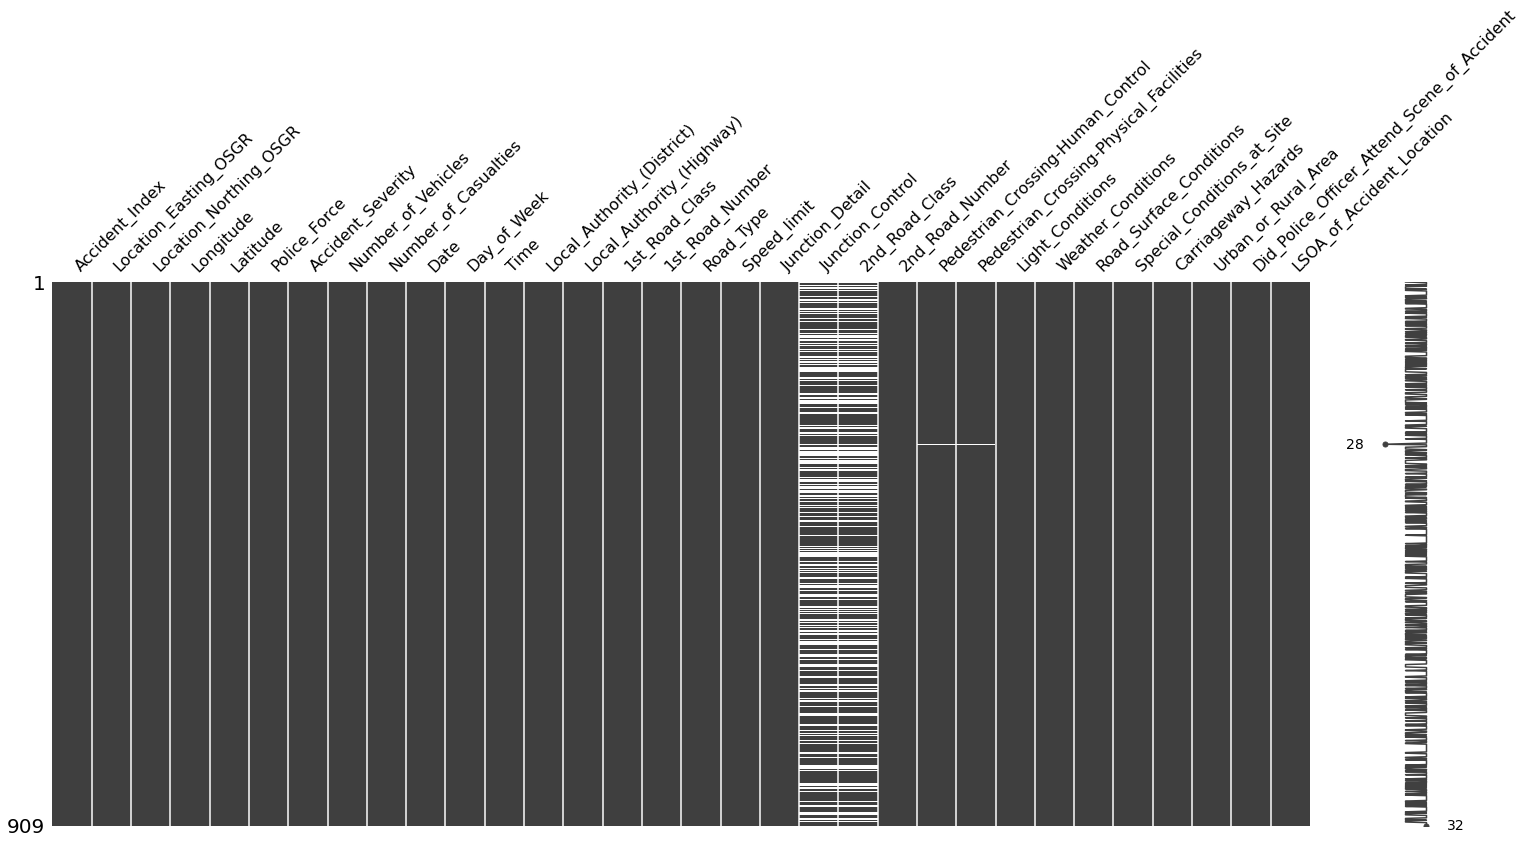

In [17]:
SA = sheffield_data['accidents'].copy()
SA.replace(-1, np.nan, inplace=True)
missingdata_df = SA.columns[SA.isnull().any()].tolist()
msno.matrix(SA);

Below we are plotting count of values per columns ignoring missing values for sheffield_data['accidents'] dataset. We also have sorted columns based on missing values.

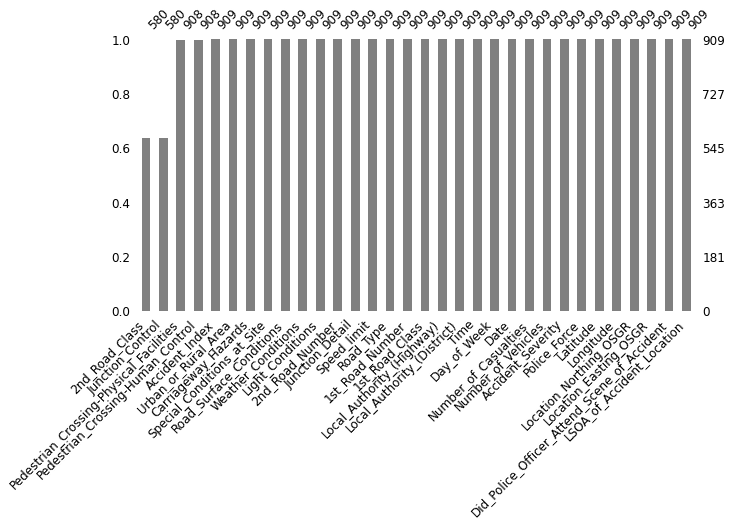

In [18]:
msno.bar(SA, color="gray", sort="ascending", figsize=(10,5), fontsize=12);

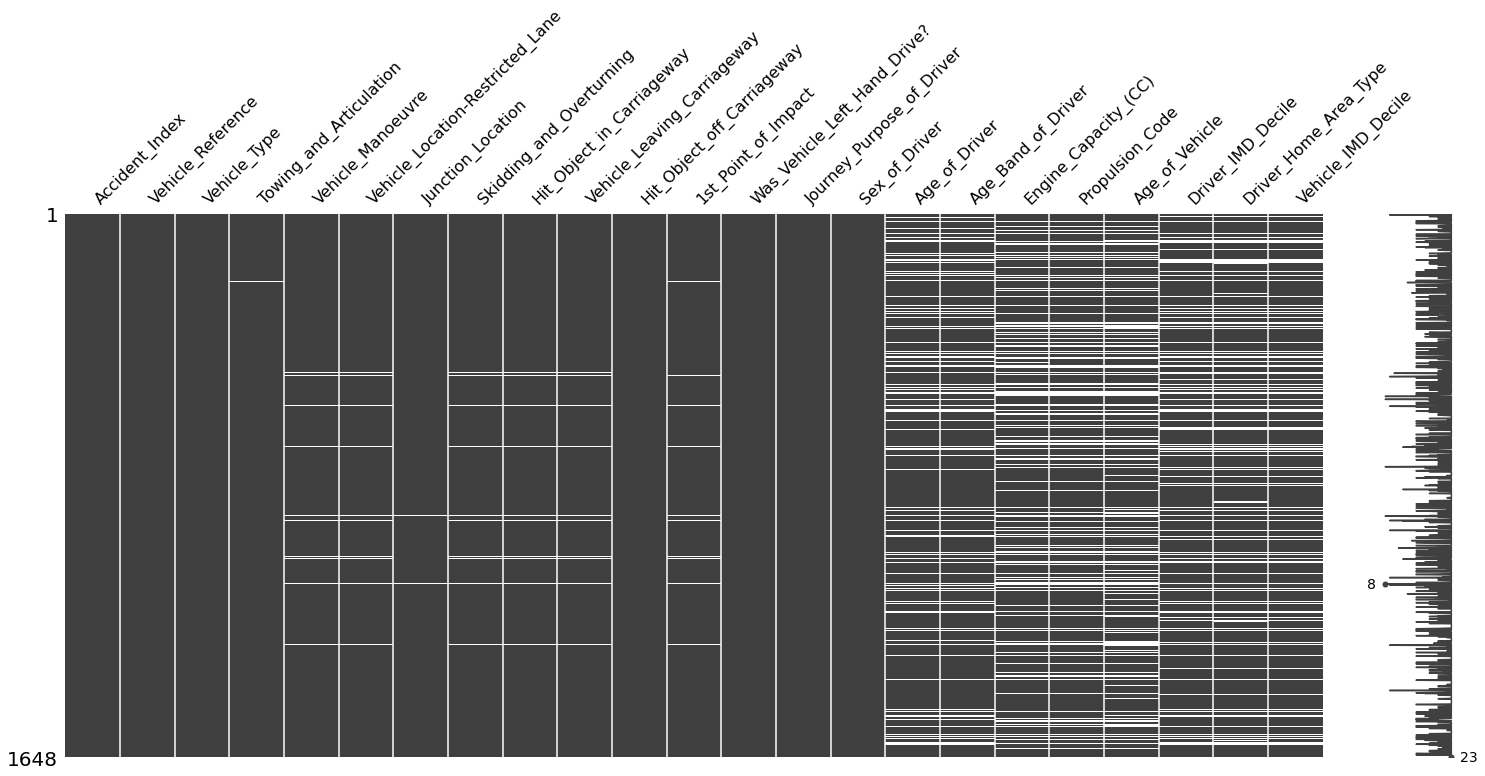

In [19]:
SV = sheffield_data['vehicles'].copy()
SV.replace(-1, np.nan, inplace=True)
missingdata_df = SV.columns[SV.isnull().any()].tolist()
msno.matrix(SV);

Below we are plotting count of values per columns ignoring missing values for sheffield_data['vehicles'] dataset. We also have sorted columns based on missing values.

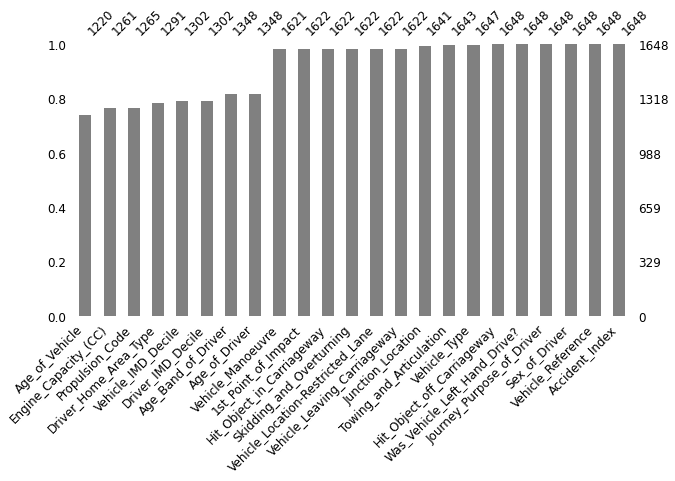

In [20]:
msno.bar(SV, color="gray", sort="ascending", figsize=(10,5), fontsize=12);

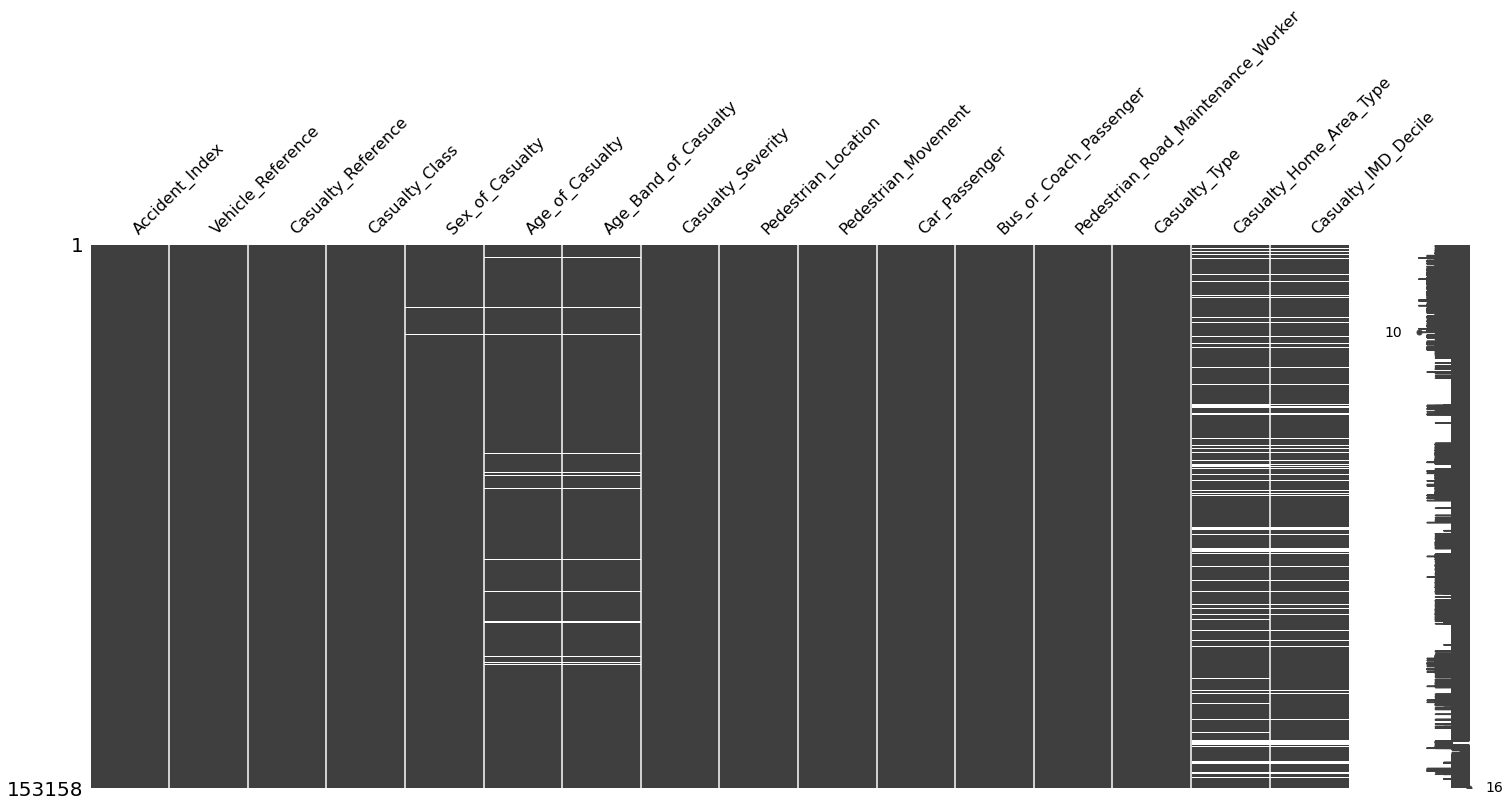

In [21]:
SC = raw_data['casualties'].copy()
SC.replace(-1, np.nan, inplace=True)
missingdata_df = SC.columns[SC.isnull().any()].tolist()
msno.matrix(SC);

Below we are plotting count of values per columns ignoring missing values for sheffield_data['casualties'] dataset. We also have sorted columns based on missing values.

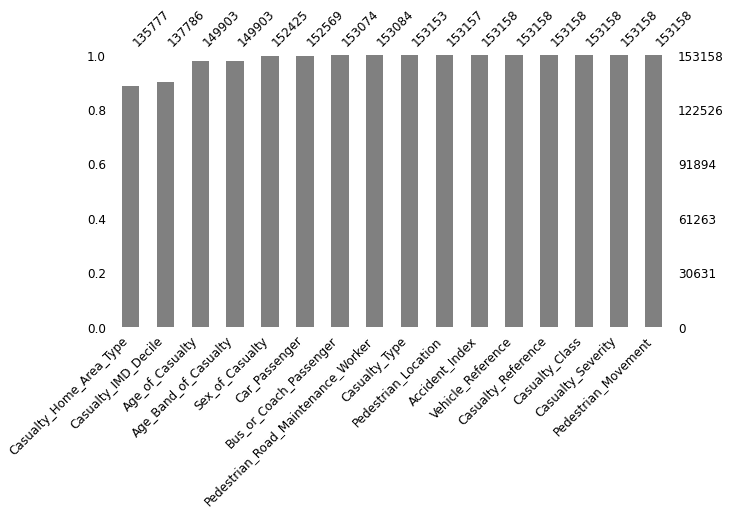

In [22]:
msno.bar(SC, color="gray", sort="ascending", figsize=(10,5), fontsize=12);

## Numerical summary

In [23]:
import matplotlib.pyplot as plt

In [206]:
sheffield_data['accidents'].info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 909 entries, 44673 to 47047
Data columns (total 32 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Accident_Index                               909 non-null    object 
 1   Location_Easting_OSGR                        909 non-null    float64
 2   Location_Northing_OSGR                       909 non-null    float64
 3   Longitude                                    909 non-null    float64
 4   Latitude                                     909 non-null    float64
 5   Police_Force                                 909 non-null    int64  
 6   Accident_Severity                            909 non-null    int64  
 7   Number_of_Vehicles                           909 non-null    int64  
 8   Number_of_Casualties                         909 non-null    int64  
 9   Date                                         909 non-null    object 
 


Five Number Summary

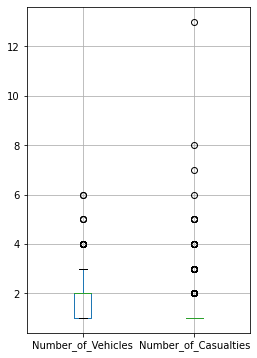

In [24]:
SAC = SA.copy()
SAC = SA[['Number_of_Vehicles', 'Number_of_Casualties']]
SAC.boxplot(figsize=(4, 6))

plt.show()

In [25]:
mask_num_vehicle = (sheffield_data['accidents']['Number_of_Vehicles']>0)
NumVehicles = sheffield_data['accidents']["Number_of_Vehicles"][mask_num_vehicle]
NumVehicles = NumVehicles.to_frame()
NumVehicles.describe()

,Number_of_Vehicles
count,909.000000
mean,1.812981
std,0.673775
min,1.000000
25%,1.000000
50%,2.000000
75%,2.000000
max,6.000000


In [26]:
mask_age_vehicle = (sheffield_data['vehicles']['Age_of_Vehicle']>=0)
AgeVehicles = sheffield_data['vehicles']['Age_of_Vehicle'][mask_age_vehicle]
AgeVehicles = AgeVehicles.to_frame()
AgeVehicles.describe()

,Age_of_Vehicle
count,1220.000000
mean,8.881967
std,5.177490
min,1.000000
25%,5.000000
50%,9.000000
75%,13.000000
max,55.000000


In [27]:
mask_age = (sheffield_data['vehicles']['Age_of_Driver']>=18)
Age_Driver =  sheffield_data['vehicles']["Age_of_Driver"][mask_age]
Age_Driver = Age_Driver.to_frame()
Age_Driver.describe()

,Age_of_Driver
count,1321.000000
mean,40.997729
std,15.937924
min,18.000000
25%,27.000000
50%,39.000000
75%,52.000000
max,91.000000


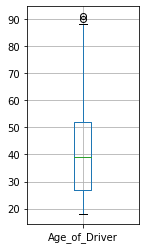

In [28]:
Age_Driver.boxplot(figsize=[2,4])

In [29]:
mask_age2 = (sheffield_data['casualties']['Age_of_Casualty']>=0)
AgeCasualty = sheffield_data['casualties']["Age_of_Casualty"][mask_age2]
AgeCasualty = AgeCasualty.to_frame()

AgeCasualty.describe()

,Age_of_Casualty
count,1155.000000
mean,37.101299
std,19.469728
min,0.000000
25%,22.000000
50%,34.000000
75%,50.000000
max,91.000000


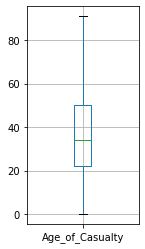

In [30]:
AgeCasualty.boxplot(figsize=(2, 4));

[]

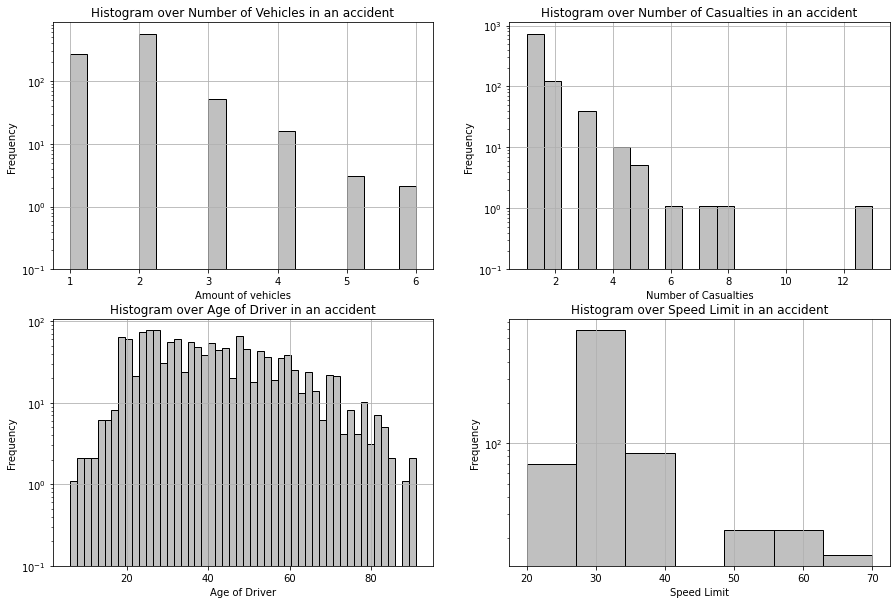

In [31]:
#Frequency Histogram
fig, ax = plt.subplots(2, 2, figsize=(15, 10))
mask = (sheffield_data["vehicles"]["Age_of_Driver"] >=0)
sheffield_data["accidents"]["Number_of_Vehicles"].hist(ax=ax[0,0], bins=20, bottom=0.1,color = 'silver',edgecolor = 'black')
sheffield_data["accidents"]["Speed_limit"].hist(ax=ax[1,1], bins=7,color = 'silver',edgecolor = 'black');
sheffield_data["accidents"]["Number_of_Casualties"].hist(ax=ax[0,1], bins=20, bottom=0.1,color = 'silver',edgecolor = 'black')
sheffield_data["vehicles"]["Age_of_Driver"][mask].hist(ax=ax[1,0], bins=50, bottom=0.1,color = 'silver',edgecolor = 'black')

ax[0,0].set_title('Histogram over Number of Vehicles in an accident')
ax[1,1].set_title('Histogram over Speed Limit in an accident')
ax[0,1].set_title('Histogram over Number of Casualties in an accident')
ax[1,0].set_title('Histogram over Age of Driver in an accident')

ax[0,0].set_ylabel('Frequency')
ax[1,0].set_ylabel('Frequency')
ax[0,1].set_ylabel('Frequency')
ax[1,1].set_ylabel('Frequency')

ax[0,0].set_xlabel('Amount of vehicles')
ax[1,1].set_xlabel('Speed Limit')
ax[0,1].set_xlabel('Number of Casualties')
ax[1,0].set_xlabel('Age of Driver')

ax[0,0].set_yscale('log')
ax[1,1].set_yscale('log')
ax[0,1].set_yscale('log')
ax[1,0].set_yscale('log')
plt.plot()

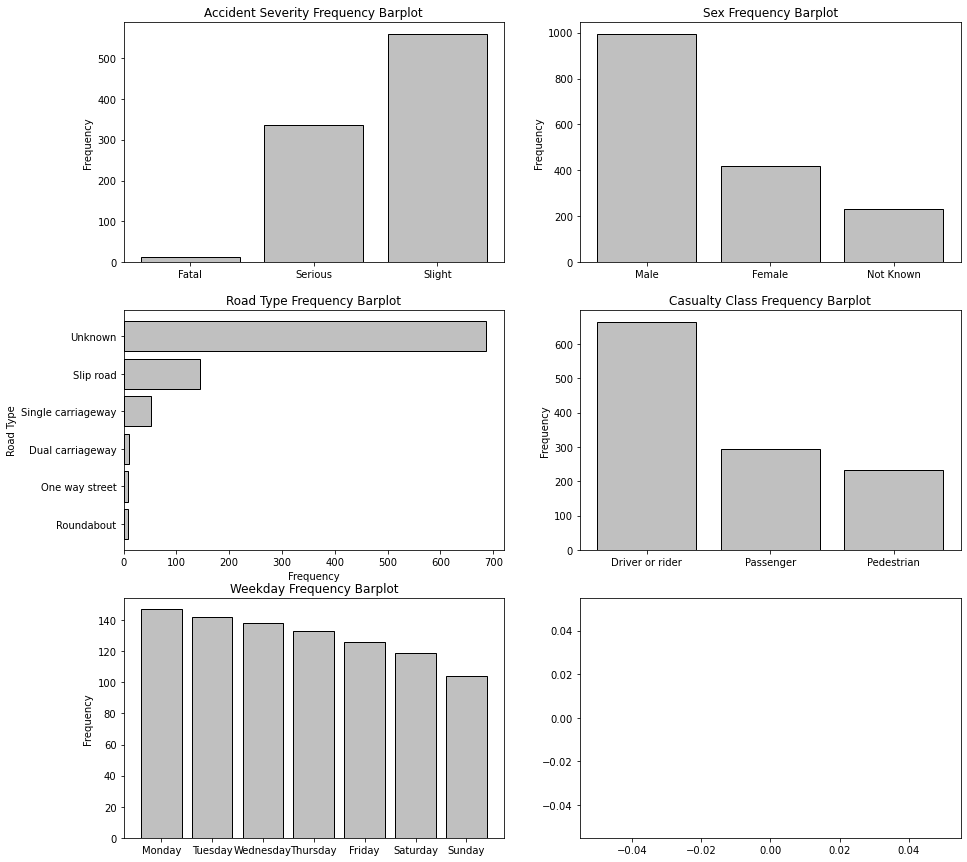

In [32]:
AS_count = sheffield_data["accidents"]["Accident_Severity"].value_counts()
AS_unq = sheffield_data["accidents"]["Accident_Severity"].unique()


RT = sheffield_data["accidents"]["Road_Type"][(sheffield_data["accidents"]["Road_Type"] >0)]
RT_count = RT.value_counts()
RT_unq = [1,2,3,4,5,6]

sex = sheffield_data["vehicles"]["Sex_of_Driver"][(sheffield_data["vehicles"]["Sex_of_Driver"] >0)]
sex_counts = sex.value_counts()
sex_unq = sex.unique()

CC_counts = sheffield_data["casualties"]["Casualty_Class"].value_counts()
CC_unq = sheffield_data["casualties"]["Casualty_Class"].unique()

weekday_counts = sheffield_data["accidents"]["Day_of_Week"].value_counts()
weekday_unq = sheffield_data["accidents"]["Day_of_Week"].unique()
fig, ax = plt.subplots(3, 2, figsize=(15, 15))

ax[0,0].set_title("Accident Severity Frequency Barplot")
ax[0,0].set_ylabel("Frequency")
ax[0,0].bar(sorted(AS_unq), sorted(AS_count), tick_label = ["Fatal", "Serious", "Slight"],color = 'silver',edgecolor = 'black')

ax[1,0].set_title("Road Type Frequency Barplot")
ax[1,0].set_ylabel("Road Type")
ax[1,0].set_xlabel("Frequency")
l = ["Roundabout", "One way street", "Dual carriageway","Single carriageway", "Slip road", "Unknown"]  
ax[1,0].barh(sorted(RT_unq), sorted(RT_count), tick_label = l,color = 'silver',edgecolor = 'black')

                                                                                                                        


ax[0,1].set_title("Sex Frequency Barplot")
ax[0,1].set_ylabel("Frequency")
ax[0,1].bar(sorted(sex_unq), sex_counts, tick_label = ["Male","Female","Not Known"],color = 'silver',edgecolor = 'black')


ax[1,1].set_title("Casualty Class Frequency Barplot")
ax[1,1].set_ylabel("Frequency")
ax[1,1].bar(sorted(CC_unq), CC_counts, tick_label = ["Driver or rider", "Passenger", "Pedestrian"],color = 'silver',edgecolor = 'black')


ax[2,0].set_title("Weekday Frequency Barplot")
ax[2,0].set_ylabel("Frequency")
ax[2,0].bar(sorted(weekday_unq), weekday_counts, tick_label = ["Monday", "Tuesday", "Wednesday","Thursday", "Friday","Saturday", "Sunday"],color = 'silver',edgecolor = 'black')

plt.plot();

# Task 1 - Single variable analysis
### Report the frequency of road collisions in your city for 

1. different age groups 
2. in different times (during the day, the week, or year)
3. and for differences in one other condition.


#### Different age groups

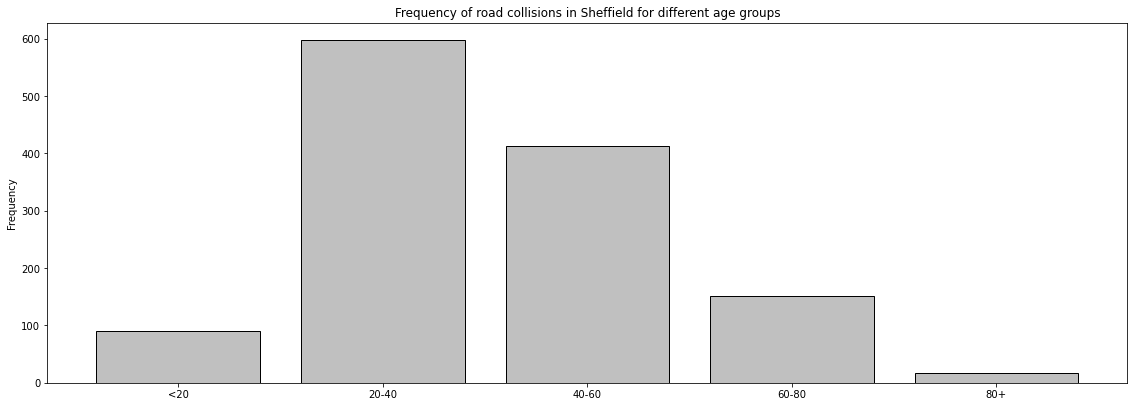

In [33]:
mask_age = (sheffield_data["vehicles"]["Age_of_Driver"] >= 0)
AoD = sheffield_data["vehicles"]["Age_of_Driver"][mask_age]


l = []
mask = (sheffield_data["vehicles"]["Age_of_Driver"] <20)

l.append(AoD[mask].shape[0])
mask = (sheffield_data["vehicles"]["Age_of_Driver"] >20) & (sheffield_data["vehicles"]["Age_of_Driver"] <40)
l.append(AoD[mask].shape[0])
mask = (sheffield_data["vehicles"]["Age_of_Driver"] >40) & (sheffield_data["vehicles"]["Age_of_Driver"] <60)
l.append(AoD[mask].shape[0])
mask = (sheffield_data["vehicles"]["Age_of_Driver"] >60) & (sheffield_data["vehicles"]["Age_of_Driver"] <80)
l.append(AoD[mask].shape[0])
mask = (sheffield_data["vehicles"]["Age_of_Driver"] >80)
l.append(AoD[mask].shape[0])

fig = plt.figure(figsize=(15,5))
axes = fig.add_axes([0,0,1,1])
axes.set_title("Frequency of road collisions in Sheffield for different age groups")
axes.set_ylabel("Frequency")
interval = ["<20",'20-40', '40-60', '60-80', '80+']
axes.bar(interval, l,color = 'silver',edgecolor = 'black');

#### Different times

##### Day

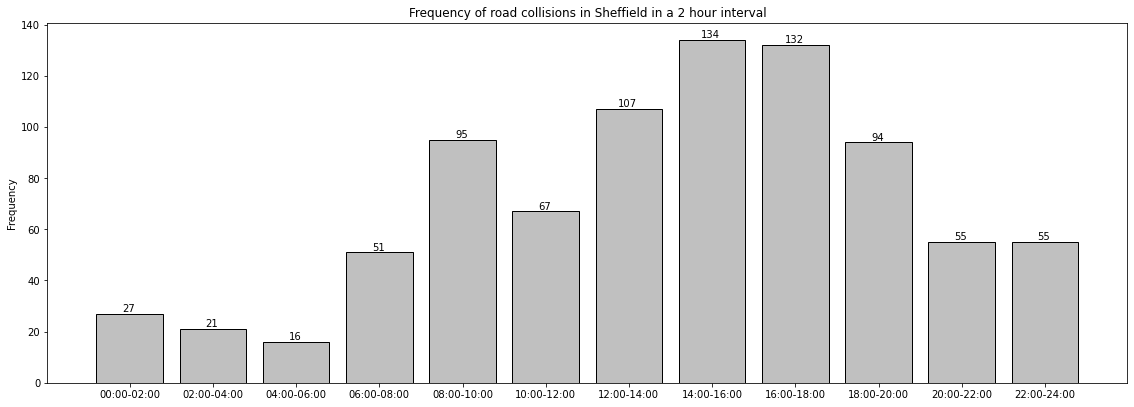

In [34]:
l = [['00:00', '02:00'], 
     ['02:00', '04:00'], 
     ['04:00', '06:00'], 
     ['06:00', '08:00'], 
     ['08:00', '10:00'], 
     ['10:00', '12:00'],
     ['12:00', '14:00'], 
     ['14:00', '16:00'], 
     ['16:00', '18:00'], 
     ['18:00', '20:00'], 
     ['20:00', '22:00'],
     ['22:00', '24:00']]

empty = []
for i in range(0,12):
    mask = (sheffield_data["accidents"]["Time"] < l[i][1]) & (sheffield_data["accidents"]["Time"] > l[i][0])
    total = len(sheffield_data["accidents"][mask]["Time"])
    empty.append(total)
    
fig = plt.figure(figsize=(15,5))
axes = fig.add_axes([0,0,1,1])
axes.set_title("Frequency of road collisions in Sheffield in a 2 hour interval")
axes.set_ylabel("Frequency")
interval = ["00:00-02:00",'02:00-04:00', '04:00-06:00', '06:00-08:00', '08:00-10:00', '10:00-12:00',
                 '12:00-14:00','14:00-16:00', '16:00-18:00', '18:00-20:00', '20:00-22:00', '22:00-24:00']
axes.bar(interval, empty,color = 'silver',edgecolor = 'black');
for index,value in enumerate(empty):
    axes.text(index - 0.015, value + 0.05,str(value),ha='center', va='bottom')

##### Week

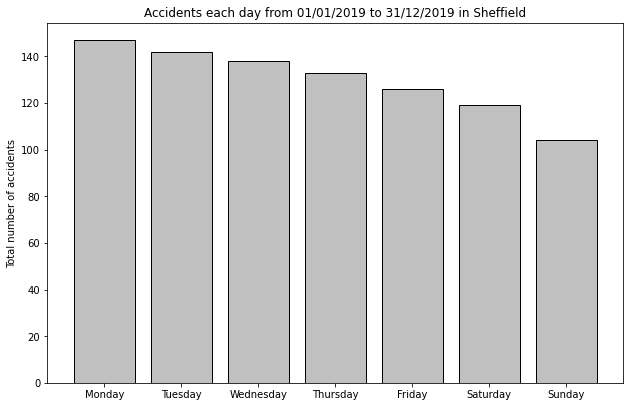

In [35]:
week = ["Monday", "Tuesday", "Wednesday","Thursday","Friday", "Saturday", "Sunday"]
unq = sheffield_data["accidents"]["Day_of_Week"].unique()
count = sheffield_data["accidents"]["Day_of_Week"].value_counts()
fig = plt.figure(figsize=(8, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.set_title("Accidents each day from 01/01/2019 to 31/12/2019 in Sheffield")
axes.set_ylabel("Total number of accidents")
axes.bar(sorted(unq), count, tick_label = week,color = 'silver',edgecolor = 'black')
plt.plot();

##### Year

##### Monthly Accident Severity

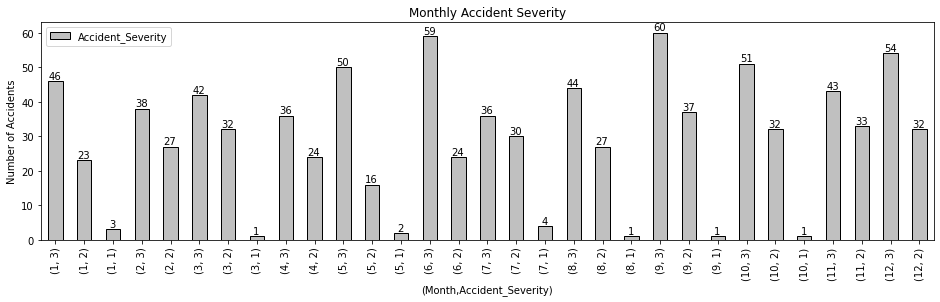

In [36]:
#####MONTHLY SEVERITY 2
accident_severity = sheffield_data['accidents']['Accident_Severity']
accident_dates = pd.to_datetime(sheffield_data['accidents']['Date'])
#accident_severity.groupby(accident_dates.dt.month).count().plot(kind="bar")
a = accident_severity.groupby(accident_dates.dt.month)
a1 = a.value_counts()

fig,ax = plt.subplots(figsize = (16,4))
a1.plot.bar(color = 'silver',edgecolor = 'black')
ax.set_title('Monthly Accident Severity')
ax.set_xlabel('(Month,Accident_Severity)')
ax.set_ylabel('Number of Accidents')
ax.legend(loc = "upper left")
for index,value in enumerate(a1):
    ax.text(index - 0.015, value + 0.05,str(value),ha='center', va='bottom')

##### Number of accidents each day

In [37]:
#COUNTING THE ACCIDENTS EACH DAY IN EVERY MONTH

accident_severity = sheffield_data['accidents']['Accident_Severity']

accident_dates = pd.to_datetime(sheffield_data['accidents']['Date'])

mask = (accident_dates > "2019-12-01") & (accident_dates <= "2019-12-31")
s = accident_dates[mask].value_counts()
print(s)

2019-12-13    8
2019-12-17    6
2019-12-10    5
2019-12-09    5
2019-12-30    4
2019-12-07    4
2019-12-20    4
2019-12-15    4
2019-12-16    3
2019-12-06    3
2019-12-24    3
2019-12-03    3
2019-12-04    3
2019-12-22    3
2019-12-18    2
2019-12-08    2
2019-12-11    2
2019-12-05    2
2019-12-12    2
2019-12-31    2
2019-12-19    2
2019-12-02    2
2019-12-21    2
2019-12-29    1
2019-12-27    1
2019-12-14    1
2019-12-25    1
2019-12-28    1
2019-12-23    1
Name: Date, dtype: int64


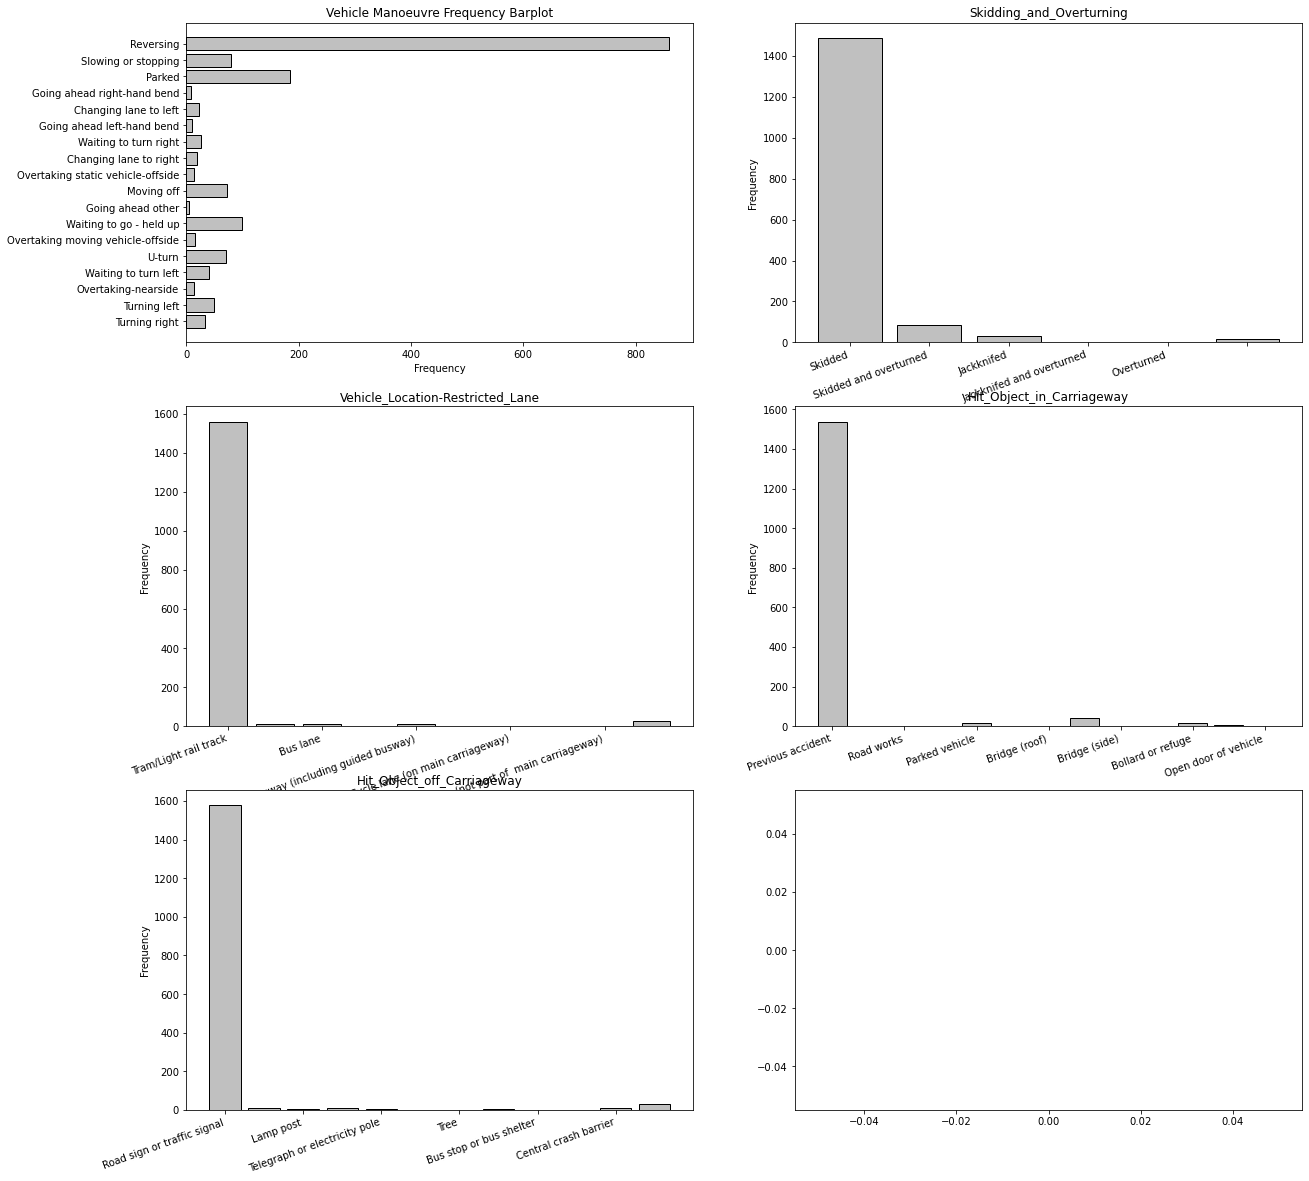

In [263]:
VM = sheffield_data["vehicles"]["Vehicle_Manoeuvre"][(sheffield_data["vehicles"]["Vehicle_Manoeuvre"]) > 0]
VM_count = VM.value_counts()
VM_unq = VM.unique()


VL = sheffield_data["vehicles"]["Vehicle_Location-Restricted_Lane"][(sheffield_data["vehicles"]["Vehicle_Location-Restricted_Lane"] >= 0)]
VL_count = VL.value_counts()
VL_unq = VL.unique()

VSO = sheffield_data["vehicles"]["Skidding_and_Overturning"][(sheffield_data["vehicles"]["Skidding_and_Overturning"] >= 0)]
VSO_counts = VSO.value_counts()
VSO_unq = VSO.unique()

VHC = sheffield_data["vehicles"]["Hit_Object_in_Carriageway"][(sheffield_data["vehicles"]["Hit_Object_in_Carriageway"]) >=0]
VHC_counts = VHC.value_counts()
VHC_unq = VHC.unique()

VHCoff = sheffield_data["vehicles"]["Hit_Object_off_Carriageway"][(sheffield_data["vehicles"]["Hit_Object_off_Carriageway"])>=0]
VHCoff_counts = VHCoff.value_counts()
VHCoff_unq = VHCoff.unique()



fig, ax = plt.subplots(3, 2, figsize=(20, 20))
#fig.subplots_adjust(hspace=0.7) 

ax[0,0].set_title("Vehicle Manoeuvre Frequency Barplot")
ax[0,0].set_xlabel("Frequency")
VM_tick_label = ["Reversing", "Parked", "Waiting to go - held up", "Slowing or stopping", "Moving off", "U-turn", "Turning left", "Waiting to turn left", "Turning right", "Waiting to turn right", "Changing lane to left", "Changing lane to right", "Overtaking moving vehicle-offside", "Overtaking static vehicle-offside", "Overtaking-nearside", "Going ahead left-hand bend", "Going ahead right-hand bend", "Going ahead other"]
ax[0,0].barh(VM_unq, VM_count, tick_label = VM_tick_label, color = 'silver',edgecolor = 'black')

ax[1,0].set_title("Vehicle_Location-Restricted_Lane")
ax[1,0].set_xlabel("Vehicle_Location-Restricted_Lane")
ax[1,0].set_ylabel("Frequency")
VL_tick_label = ['On main c way - not in restricted lane', 'Tram/Light rail track', 'Bus lane', 'Busway (including guided busway)', 'Cycle lane (on main carriageway)', 'Cycleway or shared use footway (not part of  main carriageway)', 'On lay-by or hard shoulder', 'Entering lay-by or hard shoulder', 'Leaving lay-by or hard shoulder', 'Footway (pavement)', 'Not on carriageway']
ax[1,0].bar(VL_unq, VL_count, color = 'silver',edgecolor = 'black')
ax[1,0].set_xticklabels(VL_tick_label, rotation = 20, ha="right")                                                                                                          

ax[0,1].set_title("Skidding_and_Overturning")
ax[0,1].set_ylabel("Frequency")
VSO_tick_label = ['None', 'Skidded', 'Skidded and overturned', 'Jackknifed', 'Jackknifed and overturned', 'Overturned']
ax[0,1].bar(sorted(VSO_unq), VSO_counts, color = 'silver',edgecolor = 'black')
ax[0,1].set_xticklabels(VSO_tick_label, rotation = 20, ha="right")

ax[1,1].set_title("Hit_Object_in_Carriageway")
ax[1,1].set_ylabel("Frequency")
VHC_tick_label = ['None', 'Previous accident', 'Road works', 'Parked vehicle', 'Bridge (roof)', 'Bridge (side)', 'Bollard or refuge', 'Open door of vehicle', 'Central island of roundabout', 'Kerb', 'Other object', 'Any animal (except ridden horse)']
ax[1,1].bar(VHC_unq, VHC_counts, color = 'silver',edgecolor = 'black')
ax[1,1].set_xticklabels(VHC_tick_label, rotation = 20, ha="right")

ax[2,0].set_title("Hit_Object_off_Carriageway")
ax[2,0].set_ylabel("Frequency")
VHCoff_tick_label = ['None', 'Road sign or traffic signal', 'Lamp post', 'Telegraph or electricity pole', 'Tree', 'Bus stop or bus shelter', 'Central crash barrier', 'Near/Offside crash barrier', 'Submerged in water', 'Entered ditch', 'Other permanent object', 'Wall or fence']
ax[2,0].bar(VHCoff_unq, VHCoff_counts, color = 'silver',edgecolor = 'black')
ax[2,0].set_xticklabels(VHCoff_tick_label, rotation = 20, ha="right")

plt.plot();

In [ ]:
import seaborn as sns


In [ ]:
mask = (dataraw["casualties"]["Casualty_Type"] == 0) | (dataraw["casualties"]["Casualty_Type"] == 1) | (sheffield_data["accidents"]["Road_Type"] == 6) & (sheffield_data["vehicles"]["Vehicle_Manoeuvre"] = 0) & (sheffield_data["casualties"]["Sex_of_Casualty"] > -1)
mask[600:] = False
    
data_toplot = np.array([dataraw["casualties"]["Casualty_Type"][mask], dataraw["casualties"]["Age_of_Casualty"][mask], dataraw["casualties"]["Sex_of_Casualty"][mask]]).T

fig = sns.catplot(x='Casualty Type', y='Age of Casualty', hue='Sex of Casualty', data=pd.DataFrame(data_toplot, columns=['Casualty Type', 'Age of Casualty', 'Sex of Casualty']), kind="swarm") # also show: violin
fig.set_xticklabels(["Pedestrian", "Cyclist", "Car occupant"]);

# Task 2 - Associations
### Research whether there is a significant statistical association in your city, either
1. between some vehicle attributes and accident circumstances, or 
2. between some casualty attributes and accident circumstances. 

Report whether there is a statistically significant association between such variables or not, together with the appropriate statistical metric(s).
 
Discuss why this association, or the lack of

this association, is relevant for urban/transport planning.

# Accident Severity & Road Type

In [84]:
from scipy.stats import chi2_contingency

In [120]:
mask = (sheffield_data["accidents"]["Road_Type"] != -1)
severity_roadtype = np.array([sheffield_data["accidents"]["Road_Type"][mask], sheffield_data["accidents"]["Accident_Severity"][mask]]).T
print(severity_roadtype.shape)
print(severity_roadtype)

(909, 2)
[[6 2]
 [1 3]
 [6 1]
 ...
 [6 3]
 [6 2]
 [6 3]]


In [121]:
observed_pd = pd.crosstab(severity_roadtype[:, 0], severity_roadtype[:, 1], rownames = ["Road type"], colnames = ["Accident Severity"]) 
observed = observed_pd.to_numpy()
observed_pd

Accident Severity,1,2,3
Road type,,,
1,0,14,37
2,0,5,4
3,3,49,92
6,10,265,411
7,0,2,7
9,0,2,8


# 6	Single carriageway


In [103]:
expected = np.zeros(observed.shape, dtype=int) # E, int for being more human-readable
colTotals = observed.sum(axis = 0) # C
rowTotals = observed.sum(axis = 1) # R
N = rowTotals.sum()

for i in range(observed.shape[0]):
    for j in range(observed.shape[1]):
        expected[i,j] = (rowTotals[i] * colTotals[j]) / N
        
expected

array([[  0,  18,  31],
       [  0,   3,   5],
       [  2,  53,  88],
       [  9, 254, 421],
       [  0,   3,   5],
       [  0,   3,   6]])

In [104]:
chiVal, pVal, df, expected = chi2_contingency(observed)
chiVal, pVal, df, expected.astype(int)

(8.593424282673825,
 0.5710736711026121,
 10,
 array([[  0,  18,  31],
        [  0,   3,   5],
        [  2,  53,  88],
        [  9, 254, 421],
        [  0,   3,   5],
        [  0,   3,   6]]))

In [105]:
V = np.sqrt( (chiVal/N) / (min(observed.shape)-1) )
V

0.06875213481103486

# V close to zero - weak effect

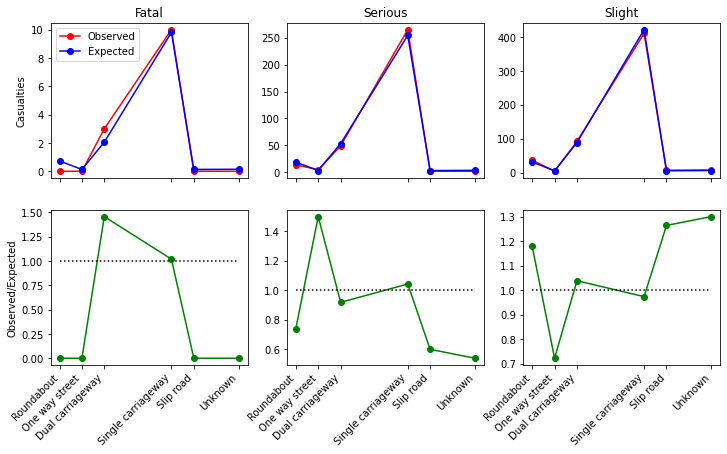

In [106]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 7))

severity_labels = ["Fatal", "Serious", "Slight"]
road_types = {1: 'Roundabout', 2: 'One way street', 3: 'Dual carriageway', 6: 'Single carriageway', 7: 'Slip road', 9: 'Unknown'}
x = np.array(list(road_types.keys()))


for i, ax in enumerate(axes[0]):
    ax.plot(x, observed[:,i], 'ro-', label='Observed')
    ax.plot(x, expected[:,i], 'bo-', label='Expected')
    if i==0: 
        ax.set_ylabel('Casualties')
        ax.legend(loc='best');
    ax.set_title(severity_labels[i])
    ax.set_xticks(x)
    ax.set_xticklabels(list(road_types.values()))
    fig.autofmt_xdate(rotation=45)

for i, ax in enumerate(axes[1]):
    ax.plot(x, observed[:,i]/expected[:,i], 'go-')
    ax.plot(x, np.ones(x.shape), 'k:')
    
    if i==0: 
        ax.set_ylabel('Observed/Expected')
    ax.set_xticks(x)
    ax.set_xticklabels(list(road_types.values()))
    fig.autofmt_xdate(rotation=45)

# STORY 2: Pedestrian_Crossing-Physical_Facilities & Accident_Severity

In [212]:
mask = (sheffield_data["accidents"]["Junction_Detail"] != -1)
severity_pedestrian = np.array([sheffield_data["accidents"]["Junction_Detail"][mask], sheffield_data["accidents"]["Accident_Severity"][mask]]).T
print(severity_pedestrian.shape)
print(severity_pedestrian)

(909, 2)
[[0 2]
 [1 3]
 [3 1]
 ...
 [3 3]
 [9 2]
 [3 3]]


In [213]:
observed_pd = pd.crosstab(severity_pedestrian[:, 0], severity_pedestrian[:, 1], rownames = ["Light_Conditions "], colnames = ["Accident Severity"]) 
observed = observed_pd.to_numpy()
observed_pd

Accident Severity,1,2,3
Light_Conditions,,,
0,3,122,204
1,0,17,40
2,0,0,3
3,8,112,156
5,0,3,9
6,1,45,86
7,0,2,6
8,0,9,7
9,1,27,48


In [214]:
expected = np.zeros(observed.shape, dtype=int) # E, int for being more human-readable
colTotals = observed.sum(axis = 0) # C
rowTotals = observed.sum(axis = 1) # R
N = rowTotals.sum()

for i in range(observed.shape[0]):
    for j in range(observed.shape[1]):
        expected[i,j] = (rowTotals[i] * colTotals[j]) / N
        
expected

array([[  4, 121, 202],
       [  0,  21,  35],
       [  0,   1,   1],
       [  3, 102, 169],
       [  0,   4,   7],
       [  1,  48,  81],
       [  0,   2,   4],
       [  0,   5,   9],
       [  1,  28,  46]])

In [215]:
chiVal, pVal, df, expected = chi2_contingency(observed)
chiVal, pVal, df, expected.astype(int)

(16.430450215689785,
 0.4233433172333412,
 16,
 array([[  4, 121, 202],
        [  0,  21,  35],
        [  0,   1,   1],
        [  3, 102, 169],
        [  0,   4,   7],
        [  1,  48,  81],
        [  0,   2,   4],
        [  0,   5,   9],
        [  1,  28,  46]]))

In [216]:
V = np.sqrt( (chiVal/N) / (min(observed.shape)-1) )
V

0.09506656291129788

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 7))

severity_labels = ["Fatal", "Serious", "Slight"]
road_types = {1: 'Roundabout', 2: 'One way street', 3: 'Dual carriageway', 6: 'Single carriageway', 7: 'Slip road', 9: 'Unknown'}
x = np.array(list(road_types.keys()))


for i, ax in enumerate(axes[0]):
    ax.plot(x, observed[:,i], 'ro-', label='Observed')
    ax.plot(x, expected[:,i], 'bo-', label='Expected')
    if i==0: 
        ax.set_ylabel('Casualties')
        ax.legend(loc='best');
    ax.set_title(severity_labels[i])
    ax.set_xticks(x)
    ax.set_xticklabels(list(road_types.values()))
    fig.autofmt_xdate(rotation=45)

for i, ax in enumerate(axes[1]):
    ax.plot(x, observed[:,i]/expected[:,i], 'go-')
    ax.plot(x, np.ones(x.shape), 'k:')
    
    if i==0: 
        ax.set_ylabel('Observed/Expected')
    ax.set_xticks(x)
    ax.set_xticklabels(list(road_types.values()))
    fig.autofmt_xdate(rotation=45)

# Road Type and junction Location
connecting vehicles_accidents 

In [226]:
vehicles_accidents = pd.merge(sheffield_data["vehicles"], sheffield_data["accidents"], on=["Accident_Index", "Accident_Index"])

,Accident_Index,Vehicle_Reference,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,2019140805407,1,1,0,18,0,0,0,0,0,...,0,0,1,1,2,0,0,2,1,E01007926
1,2019140805407,2,9,0,18,0,0,0,0,0,...,0,0,1,1,2,0,0,2,1,E01007926
2,2019140805409,1,9,0,16,9,2,0,7,7,...,0,0,4,1,1,0,0,1,1,E01008052
3,2019140805409,2,9,0,-1,-1,1,-1,-1,-1,...,0,0,4,1,1,0,0,1,1,E01008052
4,2019140805414,1,9,0,18,0,1,1,0,1,...,0,1,4,1,1,0,0,1,1,E01008123
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1643,2019140925743,1,9,0,17,0,8,0,0,0,...,0,0,4,4,2,0,0,1,1,E01007856
1644,2019140925743,2,9,0,7,0,6,0,0,0,...,0,0,4,4,2,0,0,1,1,E01007856
1645,2019140939776,1,9,0,9,0,8,0,0,0,...,0,0,4,2,2,0,0,1,1,E01007894
1646,2019140951634,1,9,0,18,0,8,0,0,0,...,0,0,4,1,1,0,0,1,1,E01008109


In [255]:
mask = (vehicles_accidents["Road_Type"] != -1)
severity_vehicleLoc = np.array([vehicles_accidents["Road_Type"][mask], vehicles_accidents["Junction_Location"][mask]]).T
print(severity_vehicleLoc.shape)
print(severity_vehicleLoc)

(1648, 2)
[[6 0]
 [6 0]
 [1 2]
 ...
 [6 8]
 [6 8]
 [6 1]]


In [256]:
observed_pd = pd.crosstab(severity_vehicleLoc[:, 0], severity_vehicleLoc[:, 1], rownames = ["Road_Type"], colnames = ["Junction_Location"]) 
observed = observed_pd.to_numpy()
observed_pd

Junction_Location,-1,0,1,2,3,4,5,6,8
Road_Type,,,,,,,,,
1,0,13,14,2,11,26,1,2,36
2,0,4,4,0,0,0,3,2,3
3,1,112,74,22,2,5,10,8,55
6,6,445,361,106,3,5,49,90,143
7,0,5,3,1,0,0,0,0,3
9,0,11,3,3,0,0,0,1,0


In [257]:
expected = np.zeros(observed.shape, dtype=int) # E, int for being more human-readable
colTotals = observed.sum(axis = 0) # C
rowTotals = observed.sum(axis = 1) # R
N = rowTotals.sum()

for i in range(observed.shape[0]):
    for j in range(observed.shape[1]):
        expected[i,j] = (rowTotals[i] * colTotals[j]) / N
        
expected

array([[  0,  37,  29,   8,   1,   2,   4,   6,  15],
       [  0,   5,   4,   1,   0,   0,   0,   1,   2],
       [  1, 103,  80,  23,   2,   6,  11,  18,  42],
       [  5, 432, 336,  98,  11,  26,  46,  75, 175],
       [  0,   4,   3,   0,   0,   0,   0,   0,   1],
       [  0,   6,   5,   1,   0,   0,   0,   1,   2]])

In [258]:
chiVal, pVal, df, expected = chi2_contingency(observed)
chiVal, pVal, df, expected.astype(int)

(478.35654154519887,
 1.8732409495437533e-76,
 40,
 array([[  0,  37,  29,   8,   1,   2,   4,   6,  15],
        [  0,   5,   4,   1,   0,   0,   0,   1,   2],
        [  1, 103,  80,  23,   2,   6,  11,  18,  42],
        [  5, 432, 336,  98,  11,  26,  46,  75, 175],
        [  0,   4,   3,   0,   0,   0,   0,   0,   1],
        [  0,   6,   5,   1,   0,   0,   0,   1,   2]]))

In [259]:
V = np.sqrt( (chiVal/N) / (min(observed.shape)-1) )
V

0.24094185676810898

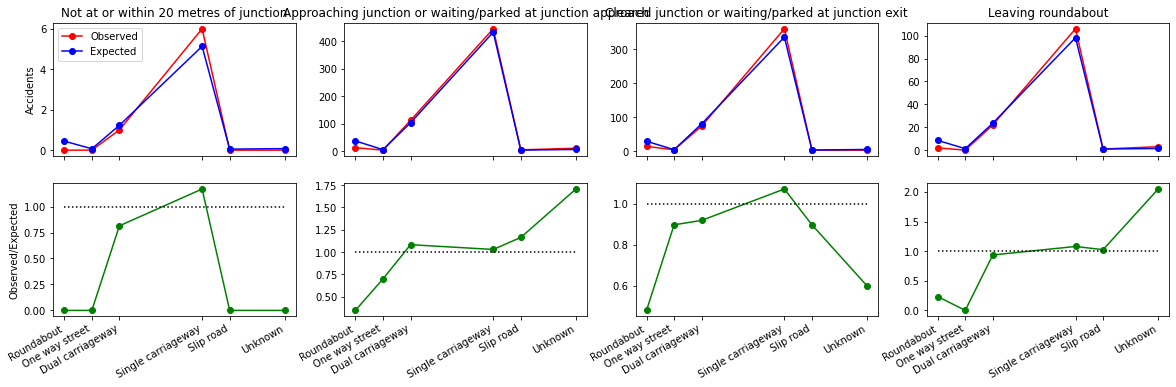

In [262]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 6))

junction_labels = ['Not at or within 20 metres of junction', 'Approaching junction or waiting/parked at junction approach', 'Cleared junction or waiting/parked at junction exit', 'Leaving roundabout', 'Entering roundabout', 'Leaving main road', 'Entering main road', 'Entering from slip road', 'Mid Junction - on roundabout or on main road']
road_categories = {1: "Roundabout", 2: "One way street", 3: "Dual carriageway", 6: "Single carriageway", 7: "Slip road", 9: "Unknown"}
x = np.array(list(road_categories.keys()))

for i, ax in enumerate(axes[0]):
    ax.plot(x, observed[:,i], 'ro-', label='Observed')
    ax.plot(x, expected[:,i], 'bo-', label='Expected')
    if i==0: 
        ax.set_ylabel('Accidents')
        ax.legend(loc='best');
    ax.set_title(junction_labels[i])
    ax.set_xticks(x)
    ax.set_xticklabels(list(road_categories.values()))
    fig.autofmt_xdate(rotation=45)

for i, ax in enumerate(axes[1]):
    ax.plot(x, observed[:,i]/expected[:,i], 'go-')
    ax.plot(x, np.ones(x.shape), 'k:')
    
    if i==0: 
        ax.set_ylabel('Observed/Expected')
    ax.set_xticks(x)
    ax.set_xticklabels(list(road_categories.values()))
    fig.autofmt_xdate(rotation=30)
    

In [ ]:
from scipy.stats import chi2_contingency
mask_ped = (sheffield_data["accidents"]["Pedestrian_Crossing-Physical_Facilities"] >=0)
mask_sev = (sheffield_data["accidents"]["Accident_Severity"] >=0)
data = [sheffield_data["accidents"]["Pedestrian_Crossing-Physical_Facilities"], sheffield_data["accidents"]["Accident_Severity"]] 
stat, p, dof, expected = chi2_contingency(data) 
  
# interpret p-value 
alpha = 0.05
print("p value is " + str(p)) 
if p <= alpha: 
    print('Dependent (reject H0)') 
else: 
    print('Independent (H0 holds true)')

# Task 3 - Map visualization
Visualize the reported collisions on a map of your city. Make a visual distinction between different
classes of casualty severity

In [ ]:
BBox = min(sheffield_data["accidents"]["Longitude"]), max(sheffield_data["accidents"]["Longitude"]), min(sheffield_data["accidents"]["Latitude"]),  max(sheffield_data["accidents"]["Latitude"])
ruh_m = plt.imread('../map.png')
mask_1 = (sheffield_data["accidents"]["Accident_Severity"] == 1)
mask_2 = (sheffield_data["accidents"]["Accident_Severity"] == 2)
mask_3 = (sheffield_data["accidents"]["Accident_Severity"] == 3)
fig, ax = plt.subplots(figsize = (16,14))

ax.scatter(sheffield_data["accidents"]["Longitude"][mask_1], sheffield_data["accidents"]["Latitude"][mask_1], alpha= 0.5, c='r', s=100)
ax.scatter(sheffield_data["accidents"]["Longitude"][mask_2], sheffield_data["accidents"]["Latitude"][mask_2], alpha= 0.5, c='y', s=90)
ax.scatter(sheffield_data["accidents"]["Longitude"][mask_3], sheffield_data["accidents"]["Latitude"][mask_3], alpha= 0.5, c='g', s=80)

ax.set_title('Plotting Spatial Data on Riyadh Map')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(ruh_m, zorder=0, extent = BBox, aspect= 'equal');

# Task 4: Open question
Use the data to formulate, motivate, answer, and discuss another research question of your choice.
For example, compare your city to the whole UK, or investigate different collision participants (bicycle
vs car, bicycle-motored two-wheeler, pedestrian vs car, car vs car,…), or compare the age distribution
of casualties to the existing age distribution, or rank/compare how problematic different driver
demographics are (young/old male/female),…